In [6]:
import keras 
from keras.datasets import mnist #Vase de dadis MNIST
from tensorflow.python.keras import Sequential#Modelo da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout#Neuronios (base de rede) e regularização
from tensorflow.compat.v1.keras.optimizers import RMSprop #Otimizador (back propagation)

In [7]:
#Carregando os dado de treino e teste

In [11]:
(x_treino, y_treino),(x_teste, y_teste) = mnist.load_data()

In [24]:
print("Quantidade de imagens para treino:",len(x_treino))

print("Quantidade de imagens para teste:",len(x_teste))


print("Tipo de x_treino:",type(x_treino))
print("Tipo de x_teste:",type(x_teste))

primeira_image = x_treino[0]
representacao_primeira_imagem = y_treino[0]

print("O que imagem 0 representa:", representacao_primeira_imagem)
print("Formato da primeira imagem:", primeira_image.shape, type(primeira_image.shape))

print(primeira_image)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
Tipo de x_teste: <class 'numpy.ndarray'>
O que imagem 0 representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 17

Essa imagem representa: 5


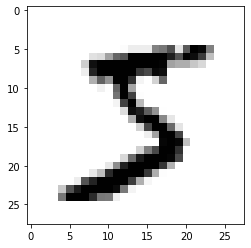

Essa imagem representa: 0


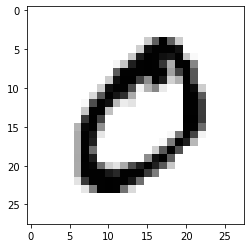

Essa imagem representa: 4


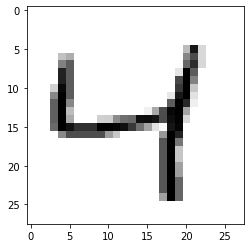

Essa imagem representa: 1


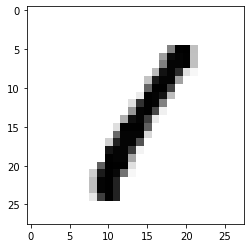

Essa imagem representa: 9


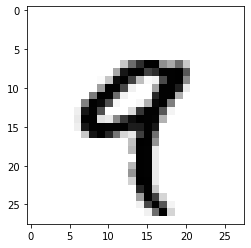

Essa imagem representa: 2


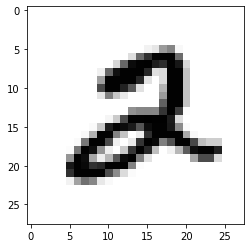

Essa imagem representa: 1


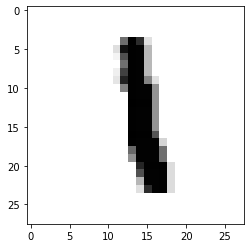

Essa imagem representa: 3


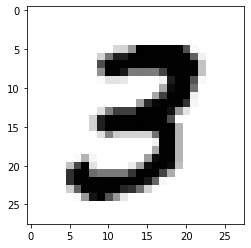

Essa imagem representa: 1


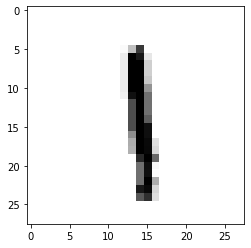

Essa imagem representa: 4


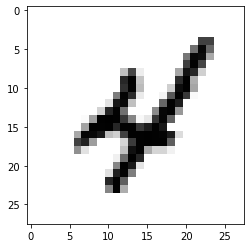

Essa imagem representa: 3


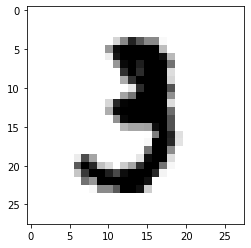

Essa imagem representa: 5


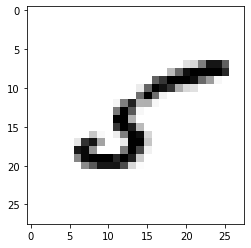

Essa imagem representa: 3


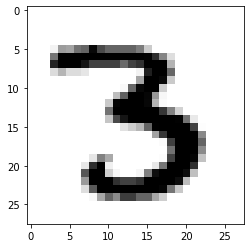

Essa imagem representa: 6


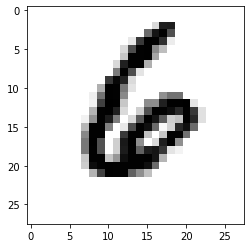

Essa imagem representa: 1


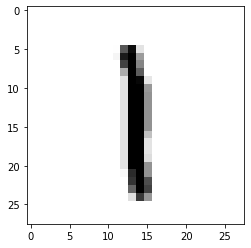

Essa imagem representa: 7


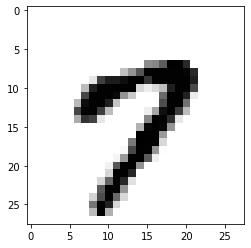

Essa imagem representa: 2


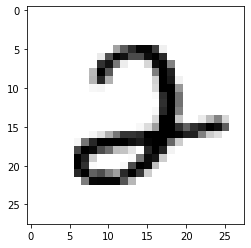

Essa imagem representa: 8


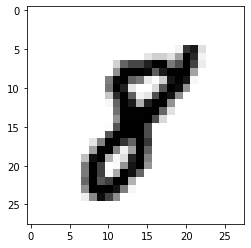

Essa imagem representa: 6


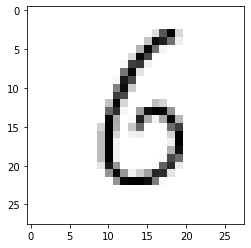

Essa imagem representa: 9


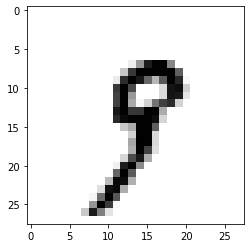

Essa imagem representa: 4


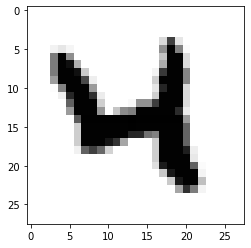

Essa imagem representa: 0


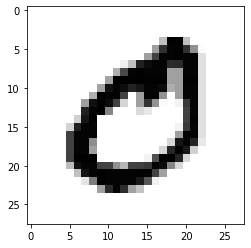

Essa imagem representa: 9


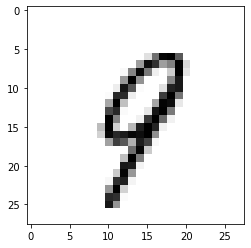

Essa imagem representa: 1


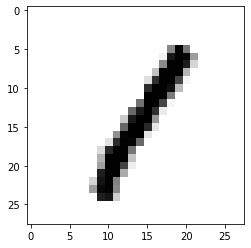

Essa imagem representa: 1


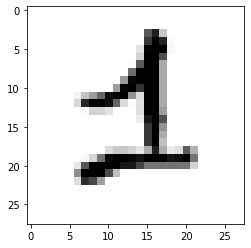

Essa imagem representa: 2


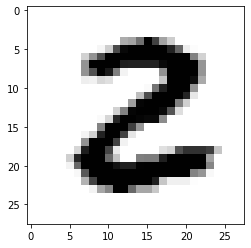

Essa imagem representa: 4


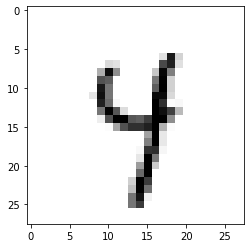

Essa imagem representa: 3


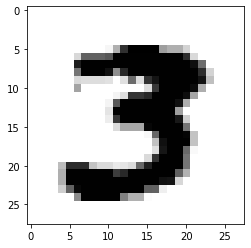

Essa imagem representa: 2


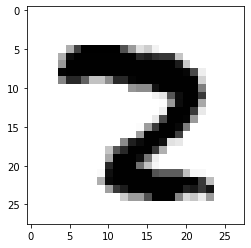

Essa imagem representa: 7


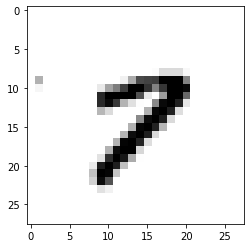

Essa imagem representa: 3


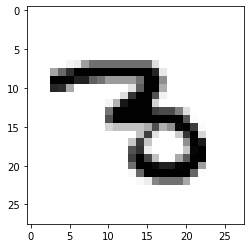

Essa imagem representa: 8


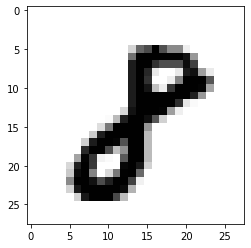

Essa imagem representa: 6


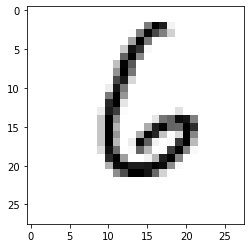

Essa imagem representa: 9


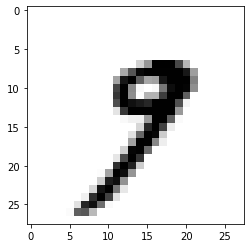

Essa imagem representa: 0


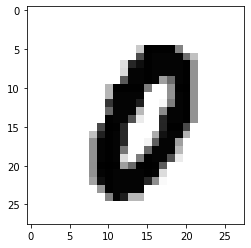

Essa imagem representa: 5


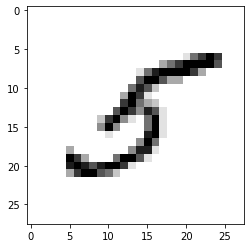

Essa imagem representa: 6


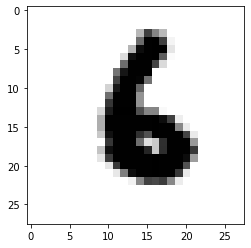

Essa imagem representa: 0


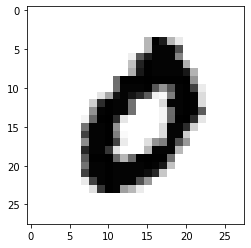

Essa imagem representa: 7


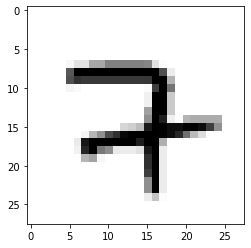

Essa imagem representa: 6


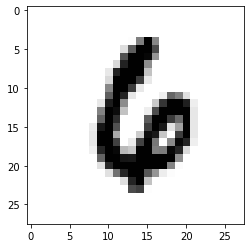

Essa imagem representa: 1


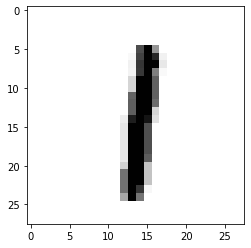

Essa imagem representa: 8


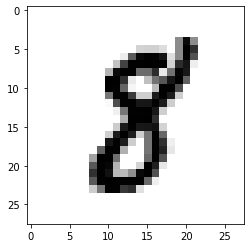

Essa imagem representa: 7


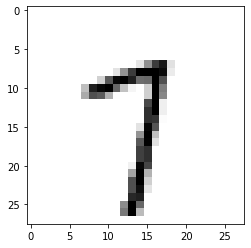

Essa imagem representa: 9


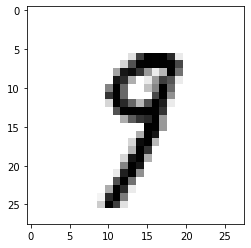

Essa imagem representa: 3


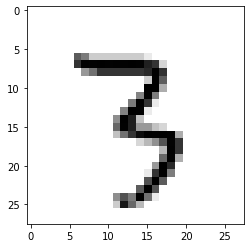

Essa imagem representa: 9


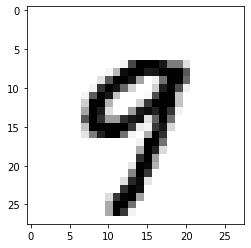

Essa imagem representa: 8


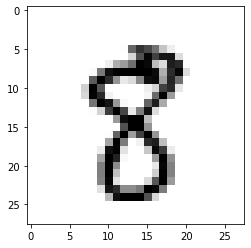

Essa imagem representa: 5


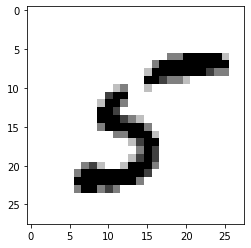

Essa imagem representa: 9


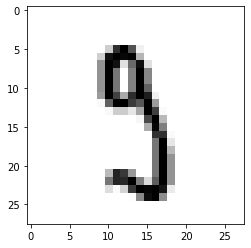

Essa imagem representa: 3


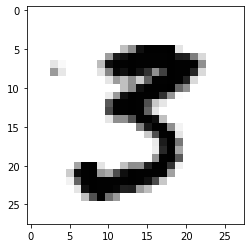

Essa imagem representa: 3


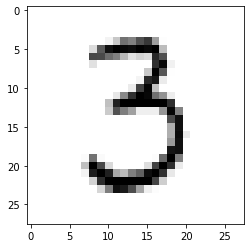

Essa imagem representa: 0


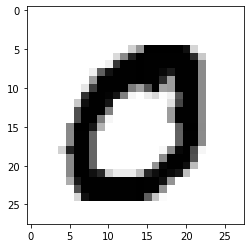

Essa imagem representa: 7


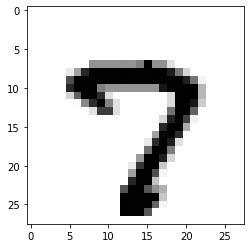

Essa imagem representa: 4


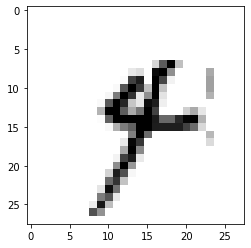

Essa imagem representa: 9


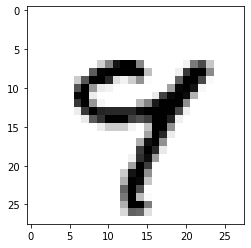

Essa imagem representa: 8


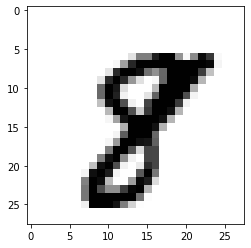

Essa imagem representa: 0


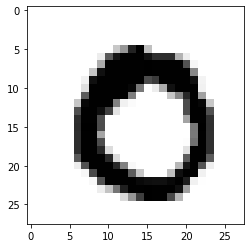

Essa imagem representa: 9


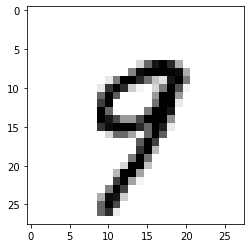

Essa imagem representa: 4


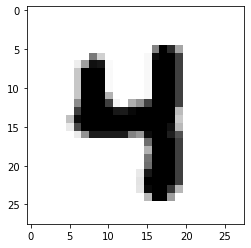

Essa imagem representa: 1


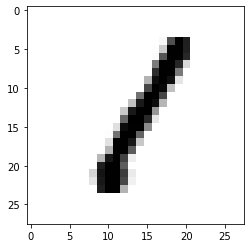

In [52]:
import matplotlib.pyplot as plt

for indice in range(60):
  print("Essa imagem representa:", y_treino[indice])
  plt.imshow(x_treino[indice],cmap=plt.cm.binary)
  plt.show()